In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
data=pd.read_csv("C:\\Users\\admin\\Desktop\\housing.csv")

In [9]:
data.head(20)


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
5,7046327064,https://reno.craigslist.org/apa/d/reno-walk-in...,reno / tahoe,https://reno.craigslist.org,1093,apartment,720,1,1.0,1,...,0,0,0,laundry in bldg,NaN,https://images.craigslist.org/00808_1EfWoZv4NX...,"1BD | 1BA | 720SQFTIn addition to attractive, ...",39.4572,-119.776,ca
6,7049020738,https://reno.craigslist.org/apa/d/1-bedroom-av...,reno / tahoe,https://reno.craigslist.org,935,apartment,661,1,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00C0C_i1DJWxfSZC...,Tucked away in a park-like setting on the edge...,39.5118,-119.802,ca
7,7049041899,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
8,7049041451,https://reno.craigslist.org/apa/d/sparks-bouti...,reno / tahoe,https://reno.craigslist.org,1525,apartment,1053,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00W0W_aMt5LvqkQh...,"BRAND NEW APARTMENT HOMES, NOW OPEN! **GET 1 ...",39.6185,-119.672,ca
9,7049041434,https://reno.craigslist.org/apa/d/reno-6850-sh...,reno / tahoe,https://reno.craigslist.org,1295,condo,930,2,2.0,0,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01313_8AoC9NJZWA...,6850 Sharlands Ave E-1021 Reno NV 89523 ...,39.5193,-119.897,ca


In [16]:
data['state'].unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'ak', 'az', 'ar'], dtype=object)

In [18]:
data = data.drop(['id', 'url','region_url', 'image_url', 'description','lat','long'], axis=1)


data = data.dropna()


KeyError: "['id', 'url', 'region_url', 'image_url', 'description', 'lat', 'long'] not found in axis"

In [20]:
print(data.isnull().sum())


region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
state                      0
dtype: int64


In [22]:
X = data.drop('price', axis=1)
y = data['price']


categorical_features = ['region', 'type', 'laundry_options', 'parking_options', 'state']
numerical_features = ['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 
                      'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']





In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
import numpy as np
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_num_scaled = scaler.transform(X_test[numerical_features])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_cat_encoded = encoder.transform(X_test[categorical_features])

X_train_transformed = np.hstack([X_train_num_scaled, X_train_cat_encoded])
X_test_transformed = np.hstack([X_test_num_scaled, X_test_cat_encoded])


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


#  RandomForest model
Rmodel = RandomForestRegressor(n_estimators=100, random_state=42)
Rmodel.fit(X_train_transformed, y_train)


y_train_pred = Rmodel.predict(X_train_transformed)
y_test_pred = Rmodel.predict(X_test_transformed)

# Evaluate the model on training and test sets
#train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
#test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R-squared: {test_r2:.4f}")







Training RMSE: 30979.6318
Training R-squared: 0.8375
Test RMSE: 12718582.8858
Test R-squared: -0.0000


In [13]:
from sklearn.linear_model import LinearRegression
#  LinearRegression model
Lmodel = LinearRegression()
Lmodel.fit(X_train_transformed, y_train)


y_train_pred = Lmodel.predict(X_train_transformed)
y_test_pred = Lmodel.predict(X_test_transformed)

Ltrain_r2 = r2_score(y_train, y_train_pred)
Ltest_r2 = r2_score(y_test, y_test_pred)

print(f"Training R-squared: {Ltrain_r2:.4f}")

print(f"Test R-squared: {Ltest_r2:.4f}")


Training R-squared: 0.0081
Test R-squared: -0.0000


In [30]:
from sklearn.tree import DecisionTreeRegressor
#  DecisionTreeRegressor model
Dmodel = DecisionTreeRegressor(random_state=42)
Dmodel.fit(X_train_transformed, y_train)


y_train_pred = Dmodel.predict(X_train_transformed)
y_test_pred = Dmodel.predict(X_test_transformed)

Dtrain_r2 = r2_score(y_train, y_train_pred)
Dtest_r2 = r2_score(y_test, y_test_pred)

print(f"Training R-squared: {Dtrain_r2:.4f}")

print(f"Test R-squared: {Dtest_r2:.4f}")


Training R-squared: 0.9409
Test R-squared: -0.0000


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
#  GradientBoostingRegressor model
Gmodel = GradientBoostingRegressor(n_estimators=100, random_state=42)
Gmodel.fit(X_train_transformed, y_train)


y_train_pred = Gmodel.predict(X_train_transformed)
y_test_pred = Gmodel.predict(X_test_transformed)

Gtrain_r2 = r2_score(y_train, y_train_pred)
Gtest_r2 = r2_score(y_test, y_test_pred)

print(f"Training R-squared: {Gtrain_r2:.4f}")

print(f"Test R-squared: {Gtest_r2:.4f}")


Training R-squared: 0.6928
Test R-squared: -0.0000


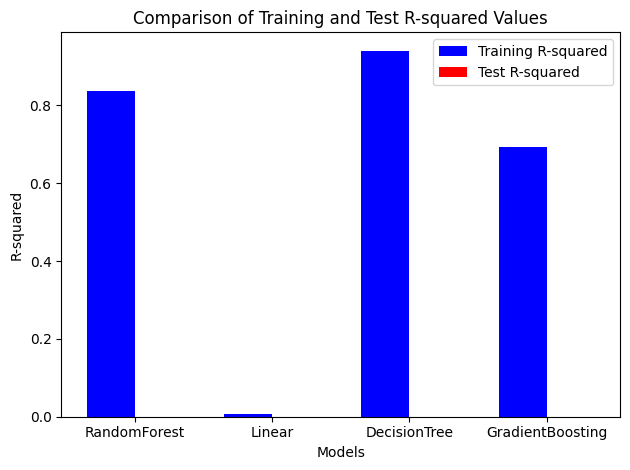

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# R-squared values for training and test sets
training_r2 = [0.8375, 0.0081, 0.9409, 0.6928]
test_r2 = [-0.0000, -0.0000, -0.0000, -0.0000]

# Labels for the models
models = ['RandomForest','Linear', 'DecisionTree', 'GradientBoosting']

# Setting the bar width
bar_width = 0.35
index = np.arange(len(models))

# Creating subplots for training and test R-squared
fig, ax = plt.subplots()

# Training bars
train_bars = ax.bar(index, training_r2, bar_width, label='Training R-squared', color='b')

# Test bars (we will offset them by the bar width to align them side by side)
test_bars = ax.bar(index + bar_width, test_r2, bar_width, label='Test R-squared', color='r')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('R-squared')
ax.set_title('Comparison of Training and Test R-squared Values')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Adding the legend
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  
    ])

In [29]:
# Fit the preprocessor and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [40]:
new_data = {
    'region': ['hilton head'],
    'type': ['apartment'],
    'sqfeet': [12000],
    'beds': [7],
    'baths': [25],
    'cats_allowed': [1],
    'dogs_allowed': [1],
    'wheelchair_access': [1],
    'electric_vehicle_charge': [1],
    'comes_furnished': [0],
    'laundry_options': ['in_unit'],
    'parking_options': ['garage'],
    'state': ['WA']
}

new_data_df = pd.DataFrame(new_data)

In [41]:
new_data_processed = preprocessor.transform(new_data_df)



In [42]:
new_data_processed

<1x487 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [43]:

predicted_price = Dmodel.predict(new_data_processed)

print(f"Predicted Price: ${predicted_price[0]:,.2f}")


Predicted Price: $8,000.00


In [34]:

import joblib

joblib.dump(Dmodel, 'house_price_model2.pkl')



['house_price_model2.pkl']